In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

BEEP! Arquivos gerados. Se não ouvir nada no 'onda_silencio.wav', você passou na prova.


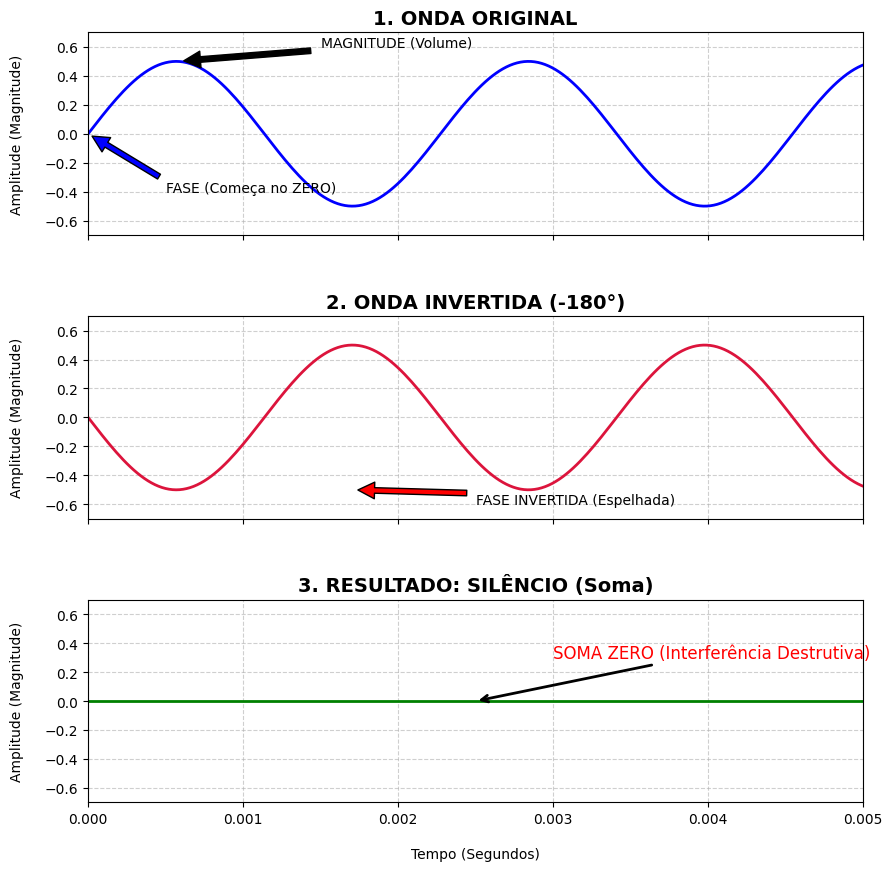

In [2]:
# --- CONFIGURAÇÕES DE FAIXA PRETA ---
frequencia = 440  # O famoso "Lá" (A4) - irritante o suficiente
sample_rate = 44100  # Qualidade de CD, porque não somos amadores
duracao = 2.0  # 2 segundos de puro suco de DSP
t = np.linspace(0, duracao, int(sample_rate * duracao), endpoint=False)

# 1. GERANDO A ONDA ORIGINAL (MAGNITUDE 1.0)
# A magnitude aqui é a amplitude máxima (o multiplicador da senoide)
amplitude = 0.5
onda_original = amplitude * np.sin(2 * np.pi * frequencia * t)

# 2. A MÁGICA: INVERSÃO DE FASE (CANCELA OU EXPULSA?)
# Multiplicar por -1 é o mesmo que rotacionar a fase em 180 graus (pi radianos)
onda_invertida = onda_original * -1

# 3. O "GRAND FINALE": SOMA DESTRUTIVA
# Se a matemática não mentir (e ela não mente, você que erra o sinal), isso dá ZERO.
onda_silencio = onda_original + onda_invertida

# --- SALVANDO OS RESULTADOS (Pra provar que não é fake news) ---
wavfile.write("onda_original.wav", sample_rate, onda_original.astype(np.float32))
wavfile.write("onda_silencio.wav", sample_rate, onda_silencio.astype(np.float32))

# --- GRÁFICOS DIDÁTICOS (ESTÉTICA CONTRA A MÁQUINA) ---
fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
plt.subplots_adjust(hspace=0.4)

# Zoom em 5 milissegundos para conseguirmos ver a onda e não um borrão
zoom_limit = 0.005 

def format_plot(ax, title, data, color):
    ax.plot(t, data, color=color, linewidth=2)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_ylabel("Amplitude (Magnitude)", labelpad=15)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.set_xlim(0, zoom_limit)
    ax.set_ylim(-0.7, 0.7)
    
    # Adicionando setas de indicação longe dos eixos
    if title == "1. ONDA ORIGINAL":
        # Seta da Magnitude
        ax.annotate('MAGNITUDE (Volume)', xy=(0.00057, 0.5), xytext=(0.0015, 0.6),
                    arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10)
        # Seta da Fase
        ax.annotate('FASE (Começa no ZERO)', xy=(0, 0), xytext=(0.0005, -0.4),
                    arrowprops=dict(facecolor='blue', shrink=0.05), fontsize=10)
    
    if title == "2. ONDA INVERTIDA (-180°)":
        # Seta da Fase Invertida
        ax.annotate('FASE INVERTIDA (Espelhada)', xy=(0.0017, -0.5), xytext=(0.0025, -0.6),
                    arrowprops=dict(facecolor='red', shrink=0.05), fontsize=10)

# Plotando as três etapas
format_plot(axs[0], "1. ONDA ORIGINAL", onda_original, 'blue')
format_plot(axs[1], "2. ONDA INVERTIDA (-180°)", onda_invertida, 'crimson')
format_plot(axs[2], "3. RESULTADO: SILÊNCIO (Soma)", onda_silencio, 'green')

axs[2].set_xlabel("Tempo (Segundos)", labelpad=15)
axs[2].annotate('SOMA ZERO (Interferência Destrutiva)', xy=(0.0025, 0), xytext=(0.003, 0.3),
                arrowprops=dict(arrowstyle='->', lw=2), fontsize=12, color='red')

print("BEEP! Arquivos gerados. Se não ouvir nada no 'onda_silencio.wav', você passou na prova.")
plt.show()